# Training

In [120]:
#Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split

In [121]:
path = "/Users/ulises.rey/local_code/ub-bicing-capstone-project/data/processed/groupby/stations_final_2024.csv"
df = pd.read_csv(path)
df

,index,station_id,month,day,hour,ctx_4,ctx_3,ctx_2,ctx_1,percentage_docks_available
0,0,1,1,1,5,0.781481,0.677778,0.696296,0.750000,0.757265
1,1,1,1,1,10,0.737374,0.711111,0.711111,0.731624,0.825926
2,2,1,1,1,15,0.827778,0.896296,0.901852,0.883333,0.857407
3,3,1,1,1,20,0.825926,0.874074,0.927778,0.918519,0.833333
4,4,1,1,2,1,0.712963,0.777778,0.814815,0.790741,0.800000
...,...,...,...,...,...,...,...,...,...,...
143017,143017,519,2,29,1,0.666667,0.628788,0.544872,0.486111,0.482639
143018,143018,519,2,29,6,0.458333,0.458333,0.465278,0.555556,0.659722
143019,143019,519,2,29,11,0.739583,0.940972,1.000000,0.944444,0.809028
143020,143020,519,2,29,16,0.795139,0.819444,0.888889,0.899306,0.975694


In [122]:
df.dropna(inplace=True)

In [125]:
df.rename(columns=lambda x: x.replace('ctx_', 'ctx-'), inplace=True)

In [126]:
df.columns

Index(['index', 'station_id', 'month', 'day', 'hour', 'ctx-4', 'ctx-3',
       'ctx-2', 'ctx-1', 'percentage_docks_available'],
      dtype='object')

In [127]:
X = df[['ctx-4', 'ctx-3', 'ctx-2', 'ctx-1']] # df[['station_id', 'month', 'day', 'hour', 'ctx-4', 'ctx-3', 'ctx-2', 'ctx-1']]
y = df['percentage_docks_available']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [129]:
X_train

,ctx-4,ctx-3,ctx-2,ctx-1
31544,0.333333,0.333333,0.333333,0.599206
9621,0.051282,0.082251,0.079365,0.257937
7637,0.460145,0.521739,0.416667,0.431438
109374,0.786458,0.815104,0.822917,0.841146
131326,0.897436,0.894231,0.897436,0.910256
...,...,...,...,...
26174,0.629167,0.129167,0.362500,0.800000
124461,0.737892,0.692593,0.671296,0.666667
107175,0.501684,0.481481,0.518519,0.518519
132441,0.932692,0.919872,0.884615,0.846154


In [130]:
y_train

31544     0.884921
9621      0.329365
7637      0.162055
109374    0.908854
131326    0.849359
            ...   
26174     1.037500
124461    0.666667
107175    0.518519
132441    0.846154
6017      0.799383
Name: percentage_docks_available, Length: 114088, dtype: float64

(array([9.4930e+03, 1.3194e+04, 1.9200e+04, 2.5162e+04, 2.9245e+04,
        1.7423e+04, 1.5200e+02, 1.1900e+02, 9.1000e+01, 9.0000e+00]),
 array([0.        , 0.17179487, 0.34358974, 0.51538462, 0.68717949,
        0.85897436, 1.03076923, 1.2025641 , 1.37435897, 1.54615385,
        1.71794872]),
 <BarContainer object of 10 artists>)

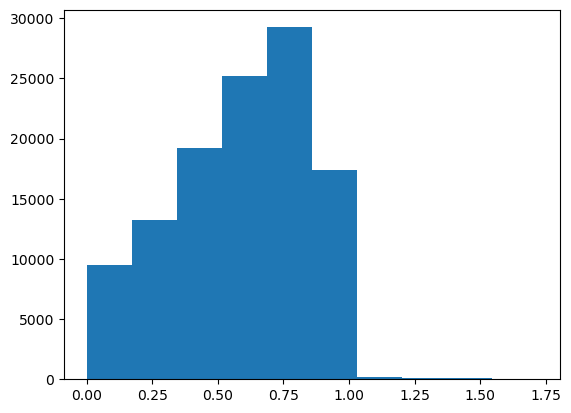

In [131]:
plt.hist(y_train)

Hay valores de ocupacion superiores a 1. Habria que corregirlo?

In [132]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()

ln_reg.fit(X_train, y_train)

LinearRegression()

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [133]:
y_pred = ln_reg.predict(X_test)

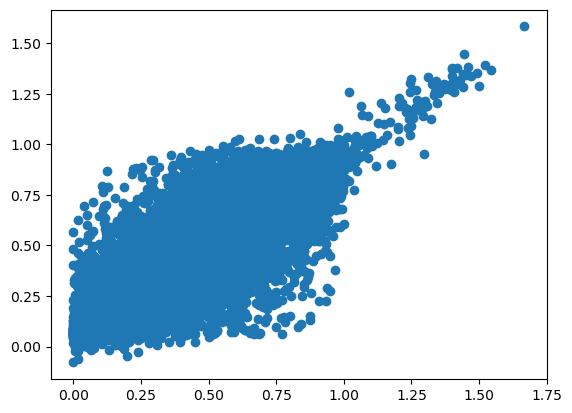

In [134]:
plt.scatter(y_test, y_pred)

plt.show()

In [135]:
score = r2_score(y_test, y_pred)
score

0.8226181739393933

In [136]:
metadata_sample_submission_df = pd.read_csv("/Users/ulises.rey/local_code/ub-bicing-capstone-project/data/external/metadata_sample_submission_2024 2.csv")

In [137]:
metadata_sample_submission_df

,index,station_id,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1
0,0,1,1,1,5,0.781481,0.677778,0.696296,0.750000
1,1,1,1,1,10,0.737374,0.711111,0.711111,0.731624
2,2,1,1,1,15,0.827778,0.896296,0.901852,0.883333
3,3,1,1,1,20,0.825926,0.874074,0.927778,0.918519
4,4,2,1,1,3,0.592593,0.341954,0.275862,0.540230
...,...,...,...,...,...,...,...,...,...
171897,171897,496,3,31,1,0.828704,0.787037,0.777778,0.853535
171898,171898,496,3,31,6,0.930556,0.944444,0.935185,0.856481
171899,171899,496,3,31,11,0.912037,0.884259,0.518519,0.157407
171900,171900,496,3,31,16,0.245370,0.319444,0.277778,0.305556


In [138]:
sample_submission_df = pd.read_csv("/Users/ulises.rey/local_code/ub-bicing-capstone-project/data/external/sample_submission_2024.csv")

In [139]:
sample_submission_df

,index,percentage_docks_available
0,0,0.228074
1,1,0.776294
2,2,0.485480
3,3,0.405185
4,4,0.773393
...,...,...
171897,171897,0.870746
171898,171898,0.874182
171899,171899,0.284646
171900,171900,0.684282


In [140]:
metadata_sample_submission_df.columns

Index(['index', 'station_id', 'month', 'day', 'hour', 'ctx-4', 'ctx-3',
       'ctx-2', 'ctx-1'],
      dtype='object')

In [143]:
#X_sample = metadata_sample_submission_df[['station_id', 'month', 'day', 'hour', 'ctx-4', 'ctx-3', 'ctx-2', 'ctx-1']]
X_sample = metadata_sample_submission_df[['ctx-4', 'ctx-3', 'ctx-2', 'ctx-1']]
y_sample = sample_submission_df['percentage_docks_available']

In [144]:
y_sample_pred = ln_reg.predict(X_sample)

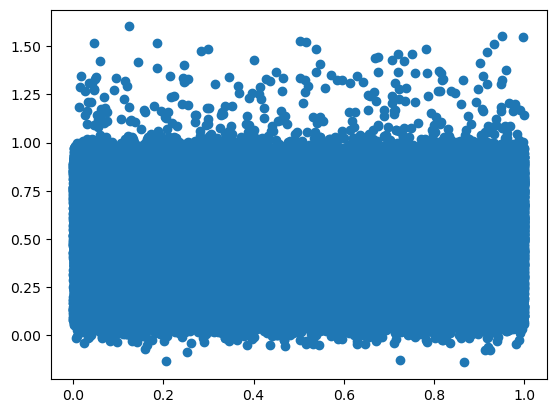

In [145]:
plt.scatter(y_sample, y_sample_pred)
plt.show()

In [146]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [147]:
score = r2_score(y_sample, y_sample_pred)
score

-0.7216877997409041

In [148]:
prediction_df = pd.DataFrame(y_sample_pred, columns=["percentage_docks_available"])
prediction_df

,percentage_docks_available
0,0.739304
1,0.718500
2,0.845656
3,0.876247
4,0.602077
...,...
171897,0.838448
171898,0.807188
171899,0.139816
171900,0.349613


In [149]:
prediction_df.index.name="index"

In [150]:
prediction_df

,percentage_docks_available
index,
0,0.739304
1,0.718500
2,0.845656
3,0.876247
4,0.602077
...,...
171897,0.838448
171898,0.807188
171899,0.139816


In [101]:
prediction_df.to_csv("/Users/ulises.rey/local_code/ub-bicing-capstone-project/data/prediction/first_prediction.csv")

### Con su dataset

In [102]:
path = "/Users/ulises.rey/local_code/ub-bicing-capstone-project/data/external/metadata_sample_submission_2024 2.csv"
df = pd.read_csv(path)

In [103]:
df

,index,station_id,month,day,hour,ctx-4,ctx-3,ctx-2,ctx-1
0,0,1,1,1,5,0.781481,0.677778,0.696296,0.750000
1,1,1,1,1,10,0.737374,0.711111,0.711111,0.731624
2,2,1,1,1,15,0.827778,0.896296,0.901852,0.883333
3,3,1,1,1,20,0.825926,0.874074,0.927778,0.918519
4,4,2,1,1,3,0.592593,0.341954,0.275862,0.540230
...,...,...,...,...,...,...,...,...,...
171897,171897,496,3,31,1,0.828704,0.787037,0.777778,0.853535
171898,171898,496,3,31,6,0.930556,0.944444,0.935185,0.856481
171899,171899,496,3,31,11,0.912037,0.884259,0.518519,0.157407
171900,171900,496,3,31,16,0.245370,0.319444,0.277778,0.305556


In [108]:
# provar solo con las variables de contexto

In [116]:
# normalizar

In [104]:
df.columns

Index(['index', 'station_id', 'month', 'day', 'hour', 'ctx-4', 'ctx-3',
       'ctx-2', 'ctx-1'],
      dtype='object')

In [106]:
df_pred = pd.read_csv("/Users/ulises.rey/local_code/ub-bicing-capstone-project/data/external/sample_submission_2024.csv")

In [107]:
df_pred

,index,percentage_docks_available
0,0,0.228074
1,1,0.776294
2,2,0.485480
3,3,0.405185
4,4,0.773393
...,...,...
171897,171897,0.870746
171898,171898,0.874182
171899,171899,0.284646
171900,171900,0.684282


In [112]:
X = df[['station_id', 'month', 'day', 'hour', 'ctx-4', 'ctx-3',
       'ctx-2', 'ctx-1']]
y = df_pred['percentage_docks_available']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [114]:
ln_reg = LinearRegression()

ln_reg.fit(X_train, y_train)

LinearRegression()

In [115]:
y_pred = ln_reg.predict(X_test)

In [117]:
y_pred

array([0.50247735, 0.50407047, 0.50001869, ..., 0.50519058, 0.50044558,
       0.50061389])

In [119]:
score = r2_score(y_test, y_pred)
score

-7.699263546823154e-05